In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("autos.csv")
df.head()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


Mean Squared Error: 418884375130.52826
R-squared: -0.0018690114330275343


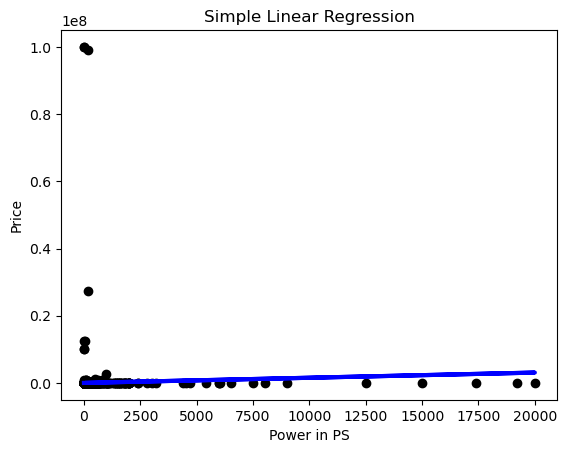

In [3]:
# დავალება 1

# ფუნქციებისა და სამიზნე ცვლადის შერჩევა
X = df[['powerPS']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ხაზოვანი რეგრესიის მოდელის შექმნა
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.title('Simple Linear Regression')
plt.xlabel('Power in PS')
plt.ylabel('Price')
plt.show()

In [4]:
# ვივარაუდოთ, რომ new_data არის DataFrame იგივე სტრუქტურით, როგორც ჩვენი ორიგინალური მონაცემთა ნაკრები
new_data = pd.DataFrame({'powerPS': [150, 200, 250]})
predicted_prices = model.predict(new_data)

print(predicted_prices)

[24192.41332272 31883.80801851 39575.20271431]


Mean Squared Error: 418873424712.33295
R-squared: -0.0018428207099940863


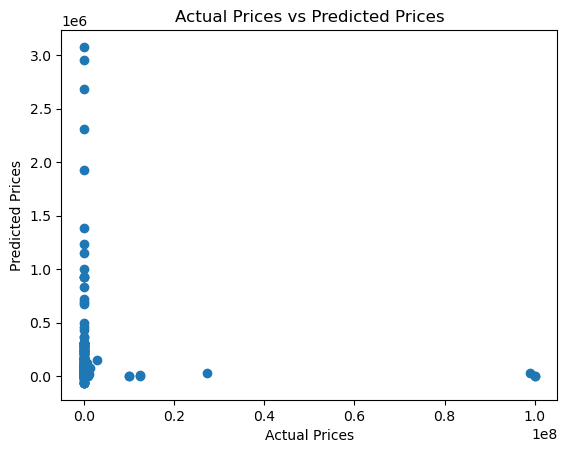

[25797.30380454 32789.44679337 39563.18980806]


In [5]:
# დავალება 2

# ფუნქციებისა და სამიზნე ცვლადის შერჩევა
X = df[['powerPS', 'yearOfRegistration', 'kilometer']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ხაზოვანი რეგრესიის მოდელის შექმნა
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

# შემოწმება მოდელის ახალ მონაცემებზე
new_data = pd.DataFrame({
    'powerPS': [150, 200, 250],
    'yearOfRegistration': [2010, 2015, 2020],
    'kilometer': [50000, 80000, 120000]
})

predicted_prices = model.predict(new_data)

print(predicted_prices)

Mean Squared Error: 435417458643.1543
R-squared: -0.04141210498855319


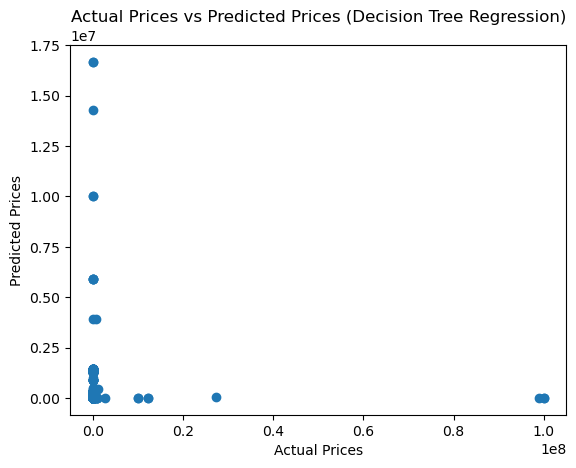

Predicted Prices on New Data: [12683.33333333 24500.         11500.        ]


In [6]:
# დავალება 3

X = df[['powerPS', 'yearOfRegistration', 'kilometer']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices (Decision Tree Regression)")
plt.show()

new_data = pd.DataFrame({
    'powerPS': [150, 200, 250],
    'yearOfRegistration': [2010, 2015, 2020],
    'kilometer': [50000, 80000, 120000]
})

predicted_prices = model.predict(new_data)

print("Predicted Prices on New Data:", predicted_prices)

In [7]:
# დავალება 4

# ვივარაუდოთ, რომ 'isExpensive' არის ორობითი სამიზნე ცვლადი (1 თუ ძვირია, 0 თუ არა)
df['isExpensive'] = (df['price'] > df['price'].median()).astype(int)

# მახასიათებლებისა და ორობითი სამიზნე ცვლადის არჩევა
X = df[['powerPS', 'yearOfRegistration', 'kilometer']]
y = df['isExpensive']

# დაყოფა მონაცემების სასწავლო და ტესტირების ნაკრებებად
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# შექმნა ლოგისტიკური რეგრესიის მოდელის
model = LogisticRegression(random_state=42)

# მოდელის მომზადება სავარჯიშო კომპლექტზე
model.fit(X_train, y_train)

# პროგნოზების გაკეთება ტესტის კომპლექტზე
y_pred = model.predict(X_test)

# მოდელის შეფასება
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', classification_rep)

# მოდელის შემოწმება ახალ მონაცემებზე
new_data = pd.DataFrame({
    'powerPS': [150, 200, 250],
    'yearOfRegistration': [2010, 2015, 2020],
    'kilometer': [50000, 80000, 120000]
})

predicted_probabilities = model.predict_proba(new_data)[:, 1]  # ალბათობა 1 კლასისთვის

print("Predicted Probabilities on New Data:\n", predicted_probabilities)

Accuracy: 0.7621457217452158
Confusion Matrix:
 [[29326  7846]
 [ 9828 27306]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.79      0.77     37172
           1       0.78      0.74      0.76     37134

    accuracy                           0.76     74306
   macro avg       0.76      0.76      0.76     74306
weighted avg       0.76      0.76      0.76     74306

Predicted Probabilities on New Data:
 [0.89779246 0.91387734 0.91306463]


In [8]:
# დავალება 5

# ვივარაუდოთ, რომ 'isExpensive' არის ორობითი სამიზნე ცვლადი (1 თუ ძვირია, 0 თუ არა)
df['isExpensive'] = (df['price'] > df['price'].median()).astype(int)

# მახასიათებლებისა და ორობითი სამიზნე ცვლადის არჩევა
X = df[['powerPS']]
y = df['isExpensive']

# დაყოფა მონაცემების სასწავლო და ტესტირების ნაკრებებად
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# შექმნა გადაწყვეტილების ხის კლასიფიკაციის მოდელი
model = DecisionTreeClassifier(random_state=42)

# მოდელის მომზადება სავარჯიშო კომპლექტზე
model.fit(X_train, y_train)

# პროგნოზების გაკეთება ტესტის კომპლექტზე
y_pred = model.predict(X_test)

# მოდელის შეფასება
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', classification_rep)

# მოდელის შემოწმება ახალ მონაცემებზე
new_data = pd.DataFrame({'powerPS': [150, 200, 250]})

predicted_classes = model.predict(new_data)

print("Predicted Classes on New Data:\n", predicted_classes)

Accuracy: 0.7476112292412457
Confusion Matrix:
 [[27428  9744]
 [ 9010 28124]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.74      0.75     37172
           1       0.74      0.76      0.75     37134

    accuracy                           0.75     74306
   macro avg       0.75      0.75      0.75     74306
weighted avg       0.75      0.75      0.75     74306

Predicted Classes on New Data:
 [1 1 1]
